## Logistic Regression for binary classification

### Experiment - normalizing of input data and changing the optimizer, reducing the batch size

### import the required libraries

In [1]:
import os  

import numpy as np  
import pandas as pd 
 
import matplotlib.pyplot as plt  
%matplotlib inline

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import keras
print (keras.__version__)


Using TensorFlow backend.


2.2.4


## Load the data

In [2]:
path = 'ex2data1.txt'  
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Admitted'])  
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Plot the dataset

Text(0, 0.5, 'Exam 2 Score')

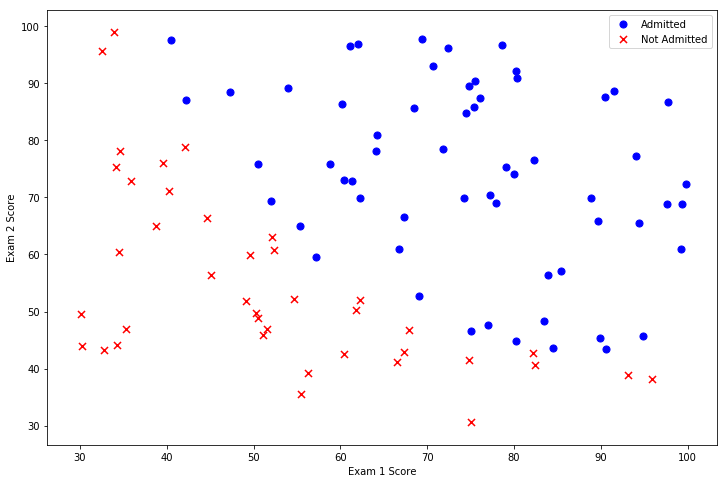

In [3]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

In [4]:
print (data.shape)

(100, 3)


In [5]:
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

In [6]:

X = np.array(X.values)
y = np.array(y.values)
print ('data_shape: ',X.shape)
print ('label_shape:',y.shape)

data_shape:  (100, 2)
label_shape: (100, 1)


In [7]:
max_x1 = np.max(X[:,0])
max_x2 = np.max(X[:,1])
print (max_x1,max_x2)

99.82785779692128 98.86943574220612


In [8]:
X[0:10]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331]])

In [9]:
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [10]:
X[:,0]=X[:,0]/max_x1
X[:,1]=X[:,1]/max_x2
X[0:10]

array([[0.34683364, 0.78916899],
       [0.30338937, 0.44396933],
       [0.35909224, 0.73735829],
       [0.60286378, 0.87295484],
       [0.79169019, 0.76205933],
       [0.45161019, 0.56960345],
       [0.61212036, 0.97615026],
       [0.75154118, 0.47086355],
       [0.76230011, 0.88420217],
       [0.84578415, 0.44031194]])

In [11]:
num_epoch = 100
batch_size = 16

In [12]:
model = Sequential()
#model.add(Dense(1, input_dim=2, activation='sigmoid',kernel_regularizer=regularizers.l2(0.5)))
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.fit(X, y, nb_epoch=10, validation_data=(x_val, y_val))
hist = model.fit(X, y, epochs=num_epoch,batch_size=batch_size)

Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6773 - acc: 0.5800
Epoch 2/100
100/100 [==============================] - 0s 375us/step - loss: 0.6762 - acc: 0.5700
Epoch 3/100
100/100 [==============================] - 0s 400us/step - loss: 0.6757 - acc: 0.5700
Epoch 4/100
100/100 [==============================] - 0s 450us/step - loss: 0.6746 - acc: 0.5800
Epoch 5/100
100/100 [==============================] - 0s 350us/step - loss: 0.6736 - acc: 0.5900
Epoch 6/100
100/100 [==============================] - 0s 300us/step - loss: 0.6729 - acc: 0.6000
Epoch 7/100
100/100 [==============================] - 0s 350us/step - loss: 0.6720 - acc: 0.5900
Epoch 8/100
100/100 [==============================] - 0s 325us/step - loss: 0.6717 - acc: 0.6000
Epoch 9/100
100/100 [==============================] - 0s 250us/step - loss: 0.6714 - acc: 0.5900
Epoch 10/100
100/100 [==============================] - 0s 250us/step - loss: 0.6708 - acc: 0.5800
Epoch 11/100
100/100 

100/100 [==============================] - 0s 225us/step - loss: 0.6509 - acc: 0.6300
Epoch 84/100
100/100 [==============================] - 0s 150us/step - loss: 0.6507 - acc: 0.6300
Epoch 85/100
100/100 [==============================] - 0s 175us/step - loss: 0.6505 - acc: 0.6200
Epoch 86/100
100/100 [==============================] - 0s 200us/step - loss: 0.6503 - acc: 0.6300
Epoch 87/100
100/100 [==============================] - 0s 150us/step - loss: 0.6502 - acc: 0.6300
Epoch 88/100
100/100 [==============================] - 0s 200us/step - loss: 0.6500 - acc: 0.6300
Epoch 89/100
100/100 [==============================] - 0s 250us/step - loss: 0.6498 - acc: 0.6200
Epoch 90/100
100/100 [==============================] - 0s 225us/step - loss: 0.6496 - acc: 0.6200
Epoch 91/100
100/100 [==============================] - 0s 175us/step - loss: 0.6494 - acc: 0.6200
Epoch 92/100
100/100 [==============================] - 0s 150us/step - loss: 0.6492 - acc: 0.6200
Epoch 93/100
100/100 [=

## Plotting the loss and accuracy curve

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

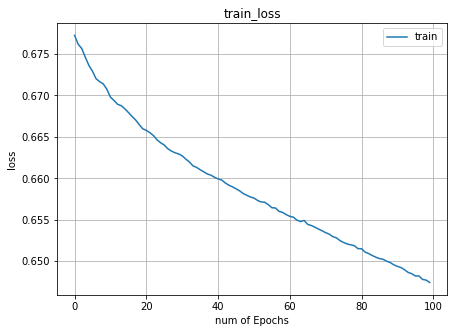

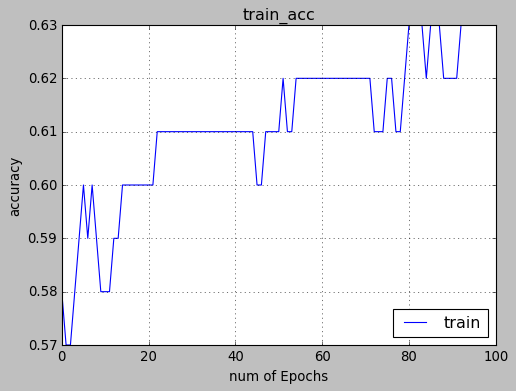

In [14]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# To save the figure
plt.savefig('loss_ex-2.png')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# To save the figure
plt.savefig('acc_ex-2.png')

## Evaluating the trained model

In [15]:
x_test=X
score = model.evaluate(x_test,y)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')


100/100 [==============================] - 0s 2ms/step
loss: 0.6472899937629699
acc:  63.0%


## Computing the prediction on new data

In [16]:
model.predict(x_test[90:100])

array([[0.6299688 ],
       [0.6716781 ],
       [0.529755  ],
       [0.6838826 ],
       [0.51549137],
       [0.53691804],
       [0.73179084],
       [0.59132123],
       [0.640611  ],
       [0.6991002 ]], dtype=float32)

In [17]:
y[0:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [18]:
model.predict_classes(x_test[90:100])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

## Saving the model and weights

In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("logistic_reg_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("logistic_reg_model_weights.h5")
print("Saved model to disk")

Saved model to disk


## Loading the model and weights

In [20]:
from keras.models import model_from_json
from keras.models import load_model

In [21]:
model_name = "logistic_reg_model.json"
weight_name = "logistic_reg_model_weights.h5"

json_file = open(model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weight_name)
print("Loaded model from disk")

Loaded model from disk


In [22]:
loaded_model.predict(x_test[90:100])

array([[0.6299688 ],
       [0.6716781 ],
       [0.529755  ],
       [0.6838826 ],
       [0.51549137],
       [0.53691804],
       [0.73179084],
       [0.59132123],
       [0.640611  ],
       [0.6991002 ]], dtype=float32)

In [23]:
#model.save('model.h5')
#loaded_model=load_model('model.h5')